In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from lassolver.utils.func import *
from lassolver.utils.signal import *
from lassolver.utils.utils import *

from lassolver.matrices.iid_gauss import iidGaussian
from lassolver.matrices.uni_invar import UniInvar

from lassolver.solver.amp import AMP
from lassolver.solver.oamp import OAMP

from lassolver.dsolver.d_amp import D_AMP
from lassolver.dsolver.d_oamp import D_OAMP

# 数値実験の設定

In [3]:
N = 4000
alpha = 0.5
M = int(alpha*N)
rho = 0.2

In [4]:
kappa = 5
P = 50
T = 30

In [5]:
x = bernouli_gaussian(N, rho)
SNR = 60

In [6]:
iidG = iidGaussian(M, N, 0, 1/M)
UniInv = UniInvar(M, N, kappa)

# i.i.d.ガウス行列での信号再構成

In [7]:
tmp_iidG = [AMP(iidG.A, x, SNR), 
        D_AMP(iidG.A, x, SNR, P), 
        OAMP(iidG.A, x, SNR), 
        D_OAMP(iidG.A, x, SNR, P)]

final mse: 0.09199135042727866


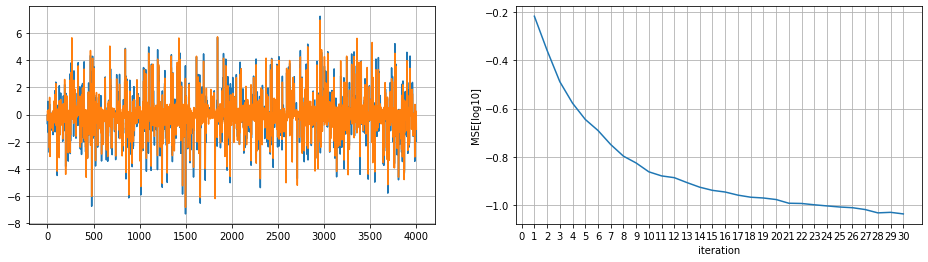

In [8]:
tmp_iidG[0].estimate(T=T)
tmp_iidG[0].result()

In [9]:
print("N(P-1): {}".format(N*(P-1)))
print("")
tmp_iidG[1].estimate(T=T, log=True)

N(P-1): 196000

1/30: tau = 1.9718365325213087, v = 0.9839471413134148
Rp: 79349.0 	 F: 1860 	 F\Rp: 55268
Total Communication Cost: 134617
2/30: tau = 0.9940449629973027, v = 0.4950513565514119
Rp: 84278.0 	 F: 1988 	 F\Rp: 56615
Total Communication Cost: 140893
3/30: tau = 0.7006750221053146, v = 0.34836638610541787
Rp: 85346.0 	 F: 2018 	 F\Rp: 56901
Total Communication Cost: 142247
4/30: tau = 0.43592472228516665, v = 0.2159912361953439
Rp: 89589.0 	 F: 2138 	 F\Rp: 58007
Total Communication Cost: 147596
5/30: tau = 0.3222476037432567, v = 0.15915267692438892
Rp: 95199.0 	 F: 2128 	 F\Rp: 54679
Total Communication Cost: 149878
6/30: tau = 0.27143920128201876, v = 0.13374847569376994
Rp: 92982.0 	 F: 2218 	 F\Rp: 58150
Total Communication Cost: 151132
7/30: tau = 0.2697728098936688, v = 0.132915279999595
Rp: 87778.0 	 F: 2103 	 F\Rp: 57128
Total Communication Cost: 144906
8/30: tau = 0.25626936453834803, v = 0.12616355732193457
Rp: 85646.0 	 F: 2040 	 F\Rp: 56658
Total Communication

final mse: 0.29977345823504575


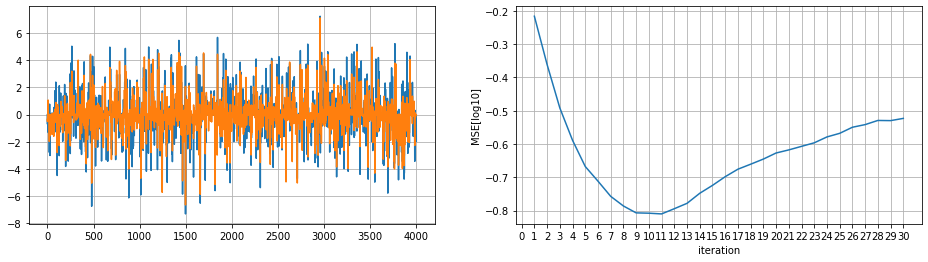

In [10]:
tmp_iidG[1].result()

final mse: 0.03516754138635491


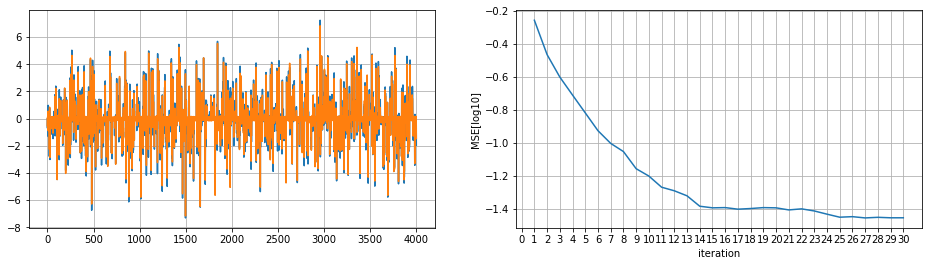

In [11]:
tmp_iidG[2].estimate(T=T)
tmp_iidG[2].result()

In [12]:
print("N(P-1): {}".format(N*(P-1)))
print("")
tmp_iidG[3].estimate(T=T, log=True)

N(P-1): 196000

1/30: tau = 0.9908363753631041, v = 0.9829894992393682
Rp: 131696.0 	 F: 1796 	 F\Rp: 30449
Total Communication Cost: 162145
2/30: tau = 0.49000744399126, v = 0.4821762959652433
Rp: 131572.0 	 F: 1968 	 F\Rp: 33624
Total Communication Cost: 165196
3/30: tau = 0.29107480040784145, v = 0.28328493636238133
Rp: 131650.0 	 F: 2006 	 F\Rp: 34013
Total Communication Cost: 165663
4/30: tau = 0.19996172401684814, v = 0.19222147169890277
Rp: 130918.0 	 F: 2074 	 F\Rp: 35444
Total Communication Cost: 166362
5/30: tau = 0.16563322142599365, v = 0.15793315254195756
Rp: 130650.0 	 F: 2044 	 F\Rp: 34904
Total Communication Cost: 165554
6/30: tau = 0.11964537799004756, v = 0.11200018206355045
Rp: 130112.0 	 F: 2040 	 F\Rp: 34988
Total Communication Cost: 165100
7/30: tau = 0.09341789592549721, v = 0.08584453063580862
Rp: 129698.0 	 F: 1983 	 F\Rp: 33834
Total Communication Cost: 163532
8/30: tau = 0.07332302706319867, v = 0.06582986581170697
Rp: 129276.0 	 F: 2103 	 F\Rp: 36031
Total C

final mse: 0.008374099016512992


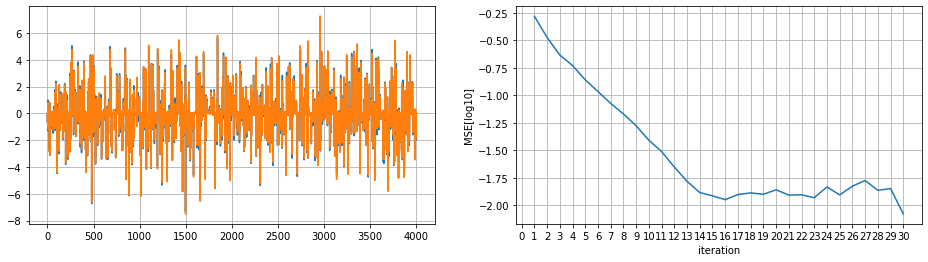

In [13]:
tmp_iidG[3].result()

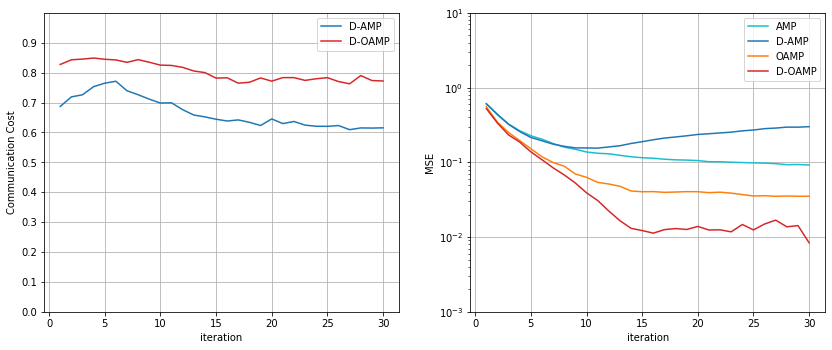

In [14]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt_CC(tmp_iidG[1].communication_cost, 'D-AMP', T, N, P, 'tab:blue')
plt_CC(tmp_iidG[3].communication_cost, 'D-OAMP', T, N, P, 'tab:red')
plt.grid()

plt.subplot(122)
plt_MSE(tmp_iidG[0].mse, 'AMP', T, 'tab:cyan')
plt_MSE(tmp_iidG[1].mse, 'D-AMP', T, 'tab:blue')
plt_MSE(tmp_iidG[2].mse, 'OAMP', T, 'tab:orange')
plt_MSE(tmp_iidG[3].mse, 'D-OAMP', T, 'tab:red')
plt.grid()

# ユニタリ不変行列での信号再構成

In [15]:
tmp_UniInv = [AMP(UniInv.A, x, SNR), 
              D_AMP(UniInv.A, x, SNR, P), 
              OAMP(UniInv.A, x, SNR), 
              D_OAMP(UniInv.A, x, SNR, P)]

final mse: 9.702764406075009e+57


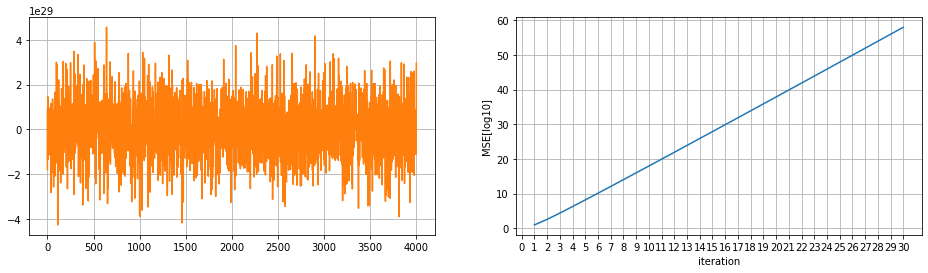

In [16]:
tmp_UniInv[0].estimate(T=T)
tmp_UniInv[0].result()

In [17]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp_UniInv[1].estimate(T=T, log=True)

N(P-1): 196000


1/30: tau = 2.0543210255463236, v = 1.0222148722926157
Rp: 142639.0 	 F: 3017 	 F\Rp: 43045
Total Communication Cost: 185684
2/30: tau = 80.18848228324725, v = 40.08929550114308
Rp: 131722.0 	 F: 2953 	 F\Rp: 50031
Total Communication Cost: 181753
3/30: tau = 4061.44720891984, v = 2030.7186588194395
Rp: 134160.0 	 F: 3041 	 F\Rp: 49583
Total Communication Cost: 183743
4/30: tau = 280578.5885750453, v = 140289.28934188213
Rp: 135154.0 	 F: 2998 	 F\Rp: 48147
Total Communication Cost: 183301
5/30: tau = 22105094.062279485, v = 11052547.026194101
Rp: 135595.0 	 F: 3017 	 F\Rp: 48051
Total Communication Cost: 183646
6/30: tau = 1876349697.5131967, v = 938174848.7516527
Rp: 135788.0 	 F: 3013 	 F\Rp: 47814
Total Communication Cost: 183602
7/30: tau = 165481581539.75488, v = 82740790769.8725
Rp: 135834.0 	 F: 2987 	 F\Rp: 47437
Total Communication Cost: 183271
8/30: tau = 14931344104803.998, v = 7465672052401.994
Rp: 135939.0 	 F: 2979 	 F\Rp: 47211
Total Communication Cost:

final mse: 1.2004715934386866e+58


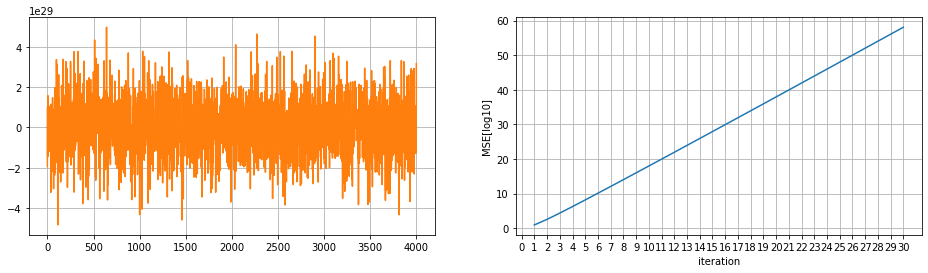

In [18]:
tmp_UniInv[1].result()

final mse: 0.021121737286830592


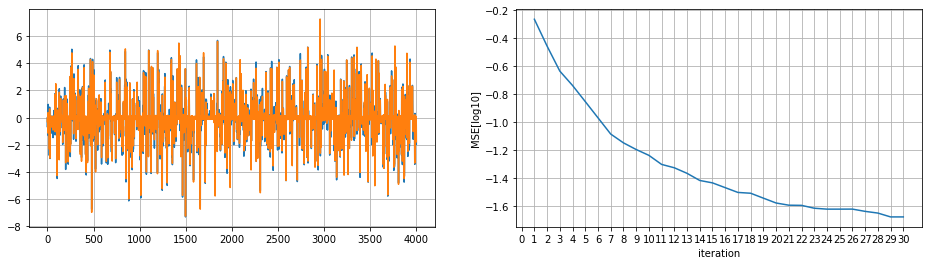

In [19]:
tmp_UniInv[2].estimate(T=T)
tmp_UniInv[2].result()

In [20]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp_UniInv[3].estimate(T=T, log=True)

N(P-1): 196000


1/30: tau = 1.031891519997312, v = 1.0228105447436366
Rp: 134805.0 	 F: 1737 	 F\Rp: 28292
Total Communication Cost: 163097
2/30: tau = 0.48441759443123167, v = 0.4753524990312305
Rp: 134965.0 	 F: 1942 	 F\Rp: 31500
Total Communication Cost: 166465
3/30: tau = 0.3379149040451466, v = 0.3288870679117276
Rp: 134223.0 	 F: 1914 	 F\Rp: 31349
Total Communication Cost: 165572
4/30: tau = 0.2170652327556591, v = 0.20807850208075696
Rp: 133895.0 	 F: 1902 	 F\Rp: 31060
Total Communication Cost: 164955
5/30: tau = 0.14756860209003256, v = 0.13864577415908713
Rp: 133466.0 	 F: 1929 	 F\Rp: 31576
Total Communication Cost: 165042
6/30: tau = 0.10699299469343788, v = 0.09814940753345028
Rp: 132874.0 	 F: 1954 	 F\Rp: 32236
Total Communication Cost: 165110
7/30: tau = 0.08198627395656062, v = 0.07323225853235361
Rp: 132289.0 	 F: 1947 	 F\Rp: 31912
Total Communication Cost: 164201
8/30: tau = 0.05878026301664784, v = 0.05015376754478062
Rp: 131345.0 	 F: 1923 	 F\Rp: 31822
Total C

final mse: 0.008846450514604996


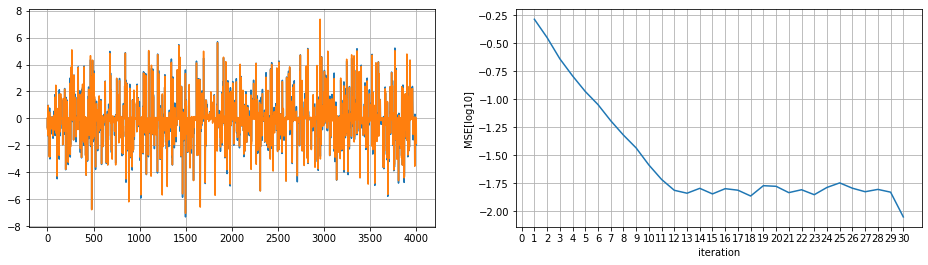

In [21]:
tmp_UniInv[3].result()

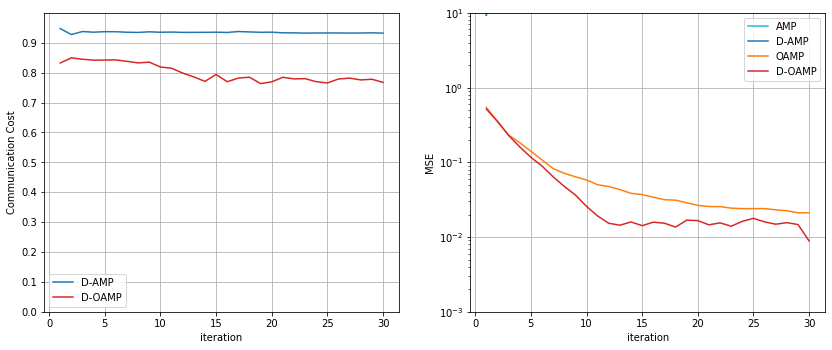

In [22]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt_CC(tmp_UniInv[1].communication_cost, 'D-AMP', T, N, P, 'tab:blue')
plt_CC(tmp_UniInv[3].communication_cost, 'D-OAMP', T, N, P, 'tab:red')
plt.grid()

plt.subplot(122)
plt_MSE(tmp_UniInv[0].mse, 'AMP', T, 'tab:cyan')
plt_MSE(tmp_UniInv[1].mse, 'D-AMP', T, 'tab:blue')
plt_MSE(tmp_UniInv[2].mse, 'OAMP', T, 'tab:orange')
plt_MSE(tmp_UniInv[3].mse, 'D-OAMP', T, 'tab:red')
plt.grid()